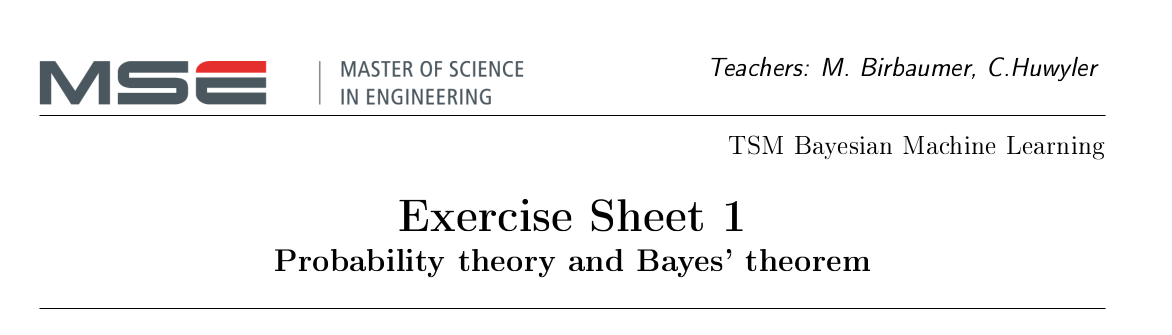

# Solutions

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)

## Exercise 1: What view of probability is more appropriate?

### a)

Frequentist approach could be used here, divide the number of cancer cases by the male Swiss population between 50 and 60, seeing cancer as a Bernoulli experiment and treating all individuals equally. We will see next week that this can also be formulated as a continuous problem from a Bayesian viewpoint.

###  b)

There is not much subjectivity in games and games are highly repeatable experiments, so a Frequentist view can be preferred. This would of course be different if the rules of the games were not known beforehand.

### c)

Frequentist statistics cannot incorporate prior information, so a Bayesian view is preferred here.

### d)

Frequentist models can only be used to assess the probability of data under a hypothesis. In principle, the physicist could check how probable her data are under the assumption of the standard model and reject this null hypothesis when a sufficiently small p-value is reached. This can be dangerously misleading, as unlikely data could also have been produced by a faulty experiment. It's better to choose a Bayesian viewpoint and to assess the probability (plausibility, degree of belief in) of the standard model or an alternative hypothesis and take into account the prior belief that her small experiment might not be enough to challenge an established and well-tested theory.

### e)

Car accidents can be seen as a repeatable random experiment and a Frequentist view can be assumed. However a Frequentist approach can only take into account historical data (e.g. observing and modelling a trend in car accidents) and not other expert-level data, such as the introduction of new laws (e.g. stronger tests of older people).

### f)

While historical data might be of some use in the prediction of inflation rates, they are probably mostly driven by expert knowledge about markets, conflicts, etc, so a Bayesian approach might be preferred. 

### g)

The doctor has assessed your symptoms (data) and can ask himself two different questions: What is the probability P(symptoms|scabies) that wou would have these symptoms given you have scabies? Are there infections or diseases with a higher probability for this symptoms? (Frequentist view) Under a Bayesian view, he could directly evaluate P(scabies|symptoms), a degree of belief in that you have scabies. The latter is much more straightforward.

### h)

Producing a large amount of screws is a highly repeatable experiment, so a Frequentist view (uncertainty is in the object) could be preferred. However, if only an extremely small number of screws is actually defective (say one in a million), then the Bayesian viewpoint might perform better because its abilities to deal better with few-sample situations.

## Exercise 2: The law of large numbers

Simulate coin tosses:

In [2]:
N_tosses = 1000
tosses = np.random.randint(2, size=N_tosses)
tosses[:20]

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Compute cumulative relative frequencies (aka frequentist probabilities):

In [3]:
cum_tosses = np.arange( 1, N_tosses+1, 1)
probs = np.cumsum( tosses ) / cum_tosses
probs[:20]

array([1.        , 0.5       , 0.33333333, 0.25      , 0.4       ,
       0.5       , 0.42857143, 0.375     , 0.44444444, 0.5       ,
       0.45454545, 0.5       , 0.53846154, 0.5       , 0.46666667,
       0.5       , 0.52941176, 0.5       , 0.47368421, 0.5       ])

Final probability:

In [4]:
probs[-1]

np.float64(0.5)

Visualize:

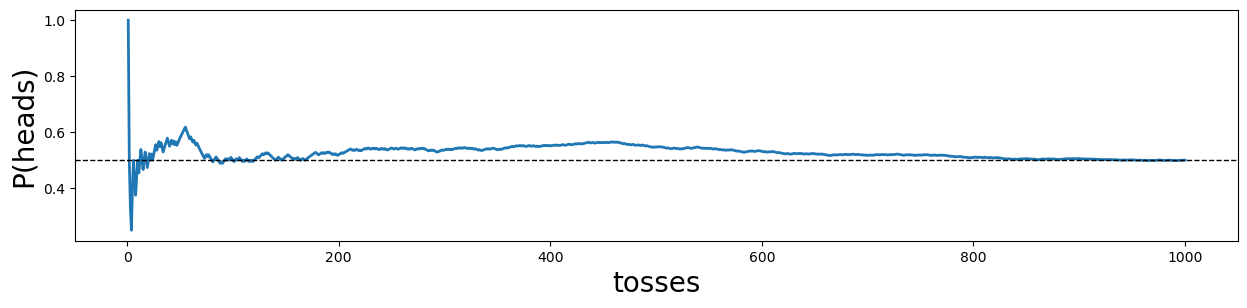

In [5]:
plt.figure( figsize=(15,3) )
plt.plot( cum_tosses, probs, lw=2 )
plt.xlabel("tosses", fontsize=20)
plt.ylabel("P(heads)", fontsize=20)
plt.axhline(0.5, c="black", lw=1, ls="--")

In [6]:
probs[-1]

np.float64(0.5)

As you can find out with trial and error, to reach more or less stably a 0.5000 or 0.4999, around $N=100$ Million coin tosses are needed! This can also be justified approximately by looking at the formula for the variance around $\hat{\pi} = 0.5$:

$$
\text{Var}[\hat{\pi}] = \text{Var}\left[\frac{k}{n}\right] = \frac{1}{n^2} \text{Var}[k] = \frac{1}{n^2} n \; \hat{\pi} \; (1-\hat{\pi}) = \frac{\hat{\pi} \; (1-\hat{\pi})}{n}.
$$

Then the standard deviation is

$$
\text{SD}[\hat{\pi}] = \sqrt{\frac{\hat{\pi} \; (1-\hat{\pi})}{n}},
$$

which is approximately for $n = 100'000'000 = 10^8$:

In [7]:
np.sqrt(0.5 * (1-0.5) / 10**8)

np.float64(5e-05)

A bit less than 10^{-4} to keep the first four digits stable!

## Exercise 3: Binomially distributed random variables

### a)

In plain Python:

In [8]:
from math import comb
pi = 0.05
n = 20
k = 1
prob = comb(n,k) * pi**k * (1-pi)**(n-k)
prob

0.37735360253530725

With `scipy.stats.binom`:

In [9]:
stats.binom.pmf(n=20, k=1, p=0.05)

np.float64(0.37735360253530753)

37.7%!

### b)

In [10]:
krange = range(21)
pmf = [stats.binom.pmf(n=20, k=k, p=0.05) for k in krange]
pmf

[np.float64(0.35848592240854216),
 np.float64(0.37735360253530753),
 np.float64(0.18867680126765404),
 np.float64(0.05958214776873281),
 np.float64(0.013327585685111266),
 np.float64(0.002244646010124003),
 np.float64(0.000295348159226843),
 np.float64(3.108927991861506e-05),
 np.float64(2.65895157198681e-06),
 np.float64(1.865930927710043e-07),
 np.float64(1.0802758002531826e-08),
 np.float64(5.168783733268815e-10),
 np.float64(2.0403093683955847e-11),
 np.float64(6.608289452293395e-13),
 np.float64(1.7390235400772084e-14),
 np.float64(3.6611021896362295e-16),
 np.float64(6.021549654006963e-18),
 np.float64(7.457027435302746e-20),
 np.float64(6.541252136230482e-22),
 np.float64(3.623962402343752e-24),
 np.float64(9.536743164062511e-27)]

Text(0, 0.5, 'p(k)')

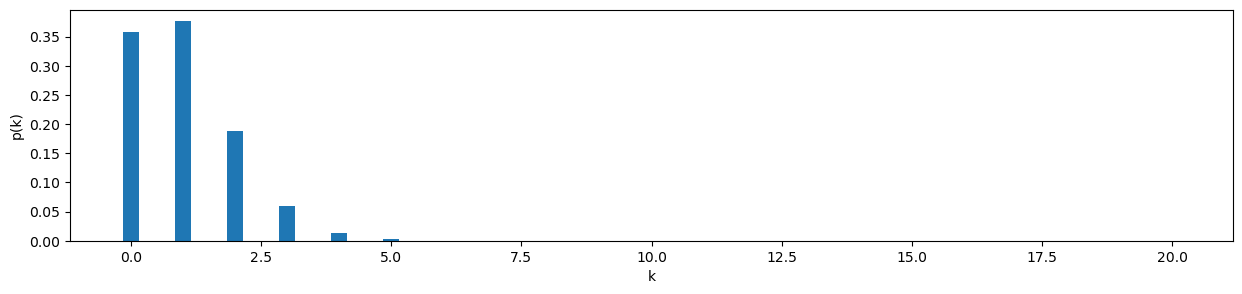

In [11]:
plt.bar( krange, pmf, width=0.3 )
plt.xlabel("k")
plt.ylabel("p(k)")

### c)

3 or less pumps faulty:

In [12]:
stats.binom.cdf(n=20, k=3, p=0.05)

np.float64(0.9840984739802364)

3 or more pumps faulty:

In [13]:
1-stats.binom.cdf(n=20, k=3, p=0.05)

np.float64(0.01590152601976358)

1.6%!

### d)

The probably for 10 pumps to be faulty is extremely small (one in every 100 million days..):

In [14]:
stats.binom.pmf(n=20, k=10, p=0.05)

np.float64(1.0802758002531826e-08)

Probably a machine is broken or a bad batch of input materials was used!

## Exercise 4: Expectation of a PMF

$$
\begin{eqnarray}
E[X] &=& \sum_{k=0}^\infty k \; p(k) \\
 &=& \sum_{k=1}^\infty k \; \frac{\lambda^k \; e^{-\lambda}}{k!} \quad\quad \text{term with $k=0$ drops anyway} \\
     &=& e^{-\lambda} \sum_{k=1}^\infty k \; \frac{\lambda^k}{k!} \quad\quad \text{take $e^{-\lambda}$ out of the sum} \\
     &=& e^{-\lambda} \sum_{k=1}^\infty \frac{\lambda^k}{(k-1)!} \quad\quad \text{take $k$ into the factorial} \\
     &=& e^{-\lambda} \sum_{l=0}^\infty \frac{\lambda^{l+1}}{l!} \quad\quad l \equiv k-1 \\
     &=& e^{-\lambda} \; \lambda \; \underbrace{\sum_{l=0}^\infty \frac{\lambda^l}{l!}}_{e^\lambda} \quad\quad \lambda^{l+1} = \lambda^l \cdot \lambda\\
     &=& e^{-\lambda} \; e^\lambda \; \lambda \quad\quad e^{-\lambda} \; e^{\lambda} = 1\\
     &=& \lambda
\end{eqnarray}
$$

This exercise was certainly not trivial and is not exam material. However we hope it served as a reminder about the mechanics in the expectation of a distribution and in particular of the Poisson distribution that we will use a few times within the coming weeks.

## Exercise 5: Maximum likelihood estimator

### a)

$$
\begin{eqnarray}
 \frac{\text{d}}{\text{d}\pi} L(\pi \; | \; Y=k) &=& \begin{pmatrix} n \\ k \end{pmatrix} \frac{\text{d}}{\text{d}\pi} \left[\pi^k \; (1-\pi)^{n-k} \right] \\
  &=& \begin{pmatrix} n \\ k \end{pmatrix} \left[k \; \pi^{k-1} \; (1-\pi)^{n-k} + \pi^k \; (1-\pi)^{n-k-1} \; (-1) \right] \\
  &=& \begin{pmatrix} n \\ k \end{pmatrix} \pi^{k-1} \; (1-\pi)^{n-k-1} \underbrace{\left[ k\;(1-\pi) - (n-k)\;\pi\right]}_{=0}  = 0
\end{eqnarray}
$$

$$
k\;(1-\pi) - (n-k)\;\pi = k - n\;\pi = 0 \quad \Rightarrow \quad \hat{\pi} = \frac{k}{n}
$$

Believe it or not, but it's the same maths that yield $\hat{\boldsymbol{\beta}} = (X^T X)^{-1} \, X^T \, \mathbf{y}$ as maximum likelihood solution for a linear regression with design matrix $X$ and outcomes $\mathbf{y}$.

### b)

Compute likelihood values:

In [15]:
from scipy.stats import binom
pi_values = np.arange(0,1.1,0.05)
probs = [binom.pmf(k=8, n=10, p=pi) for pi in pi_values]

Plot:

Text(0, 0.5, '$L(\\pi|k=8)$')

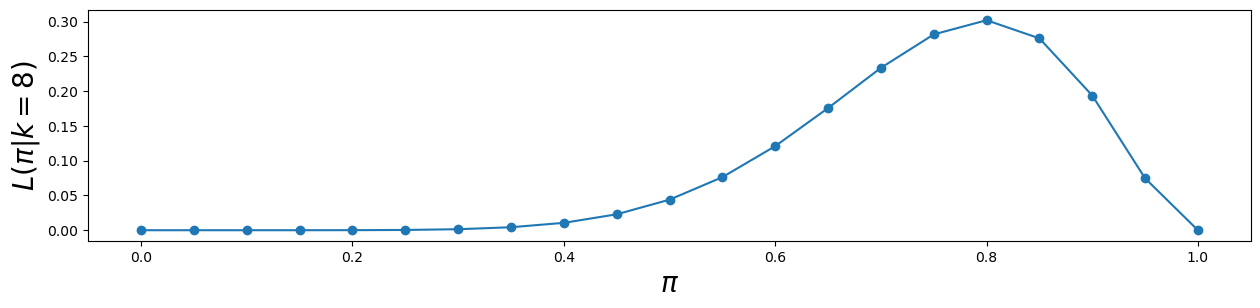

In [16]:
plt.figure( figsize=(15,3) )
plt.plot( pi_values, probs, marker="o" )
plt.xlabel("$\pi$", fontsize=20)
plt.ylabel("$L(\pi|k=8)$", fontsize=20)

## Exercise 6: Fighting terrorism

According to Wikipedia, 471'300 people walk through Zurich mainstation every day. Your system would flag 47 people as terrorists every day that would need to be arrested and investigated. With the very small rate of potential terrorists in Switzerland, almost all of the arrested people will be innocent. This would firstly be extremely expensive and secondly result in unpleasant consequences for the arrested people. Better not buy the system!

## Exercise 7: Prison populations in Switzerland

### $P(P|S)$:

We need to employ Bayes' theorem here:

$P(P|S) = \frac{P(S|P) \; P(P)}{P(S)}.$

Let's go through the individual quantities bit by bit.

$P(P)$:

In [17]:
PP = 6400 / 8740000
PP

0.0007322654462242563

The probability that a randomly selected inhabitant is in prison is 0.073%! (one in 1366 people).

$P(S), P(\overline{S})$:

In [18]:
PnotS = 0.27
PS = 1-PnotS
PS

0.73

$P(S|P)$:

In [19]:
PnotSgivenP = 0.7
PSgivenP = 1 - PnotSgivenP
PSgivenP

0.30000000000000004

Compute result for $P(P|S)$ via Bayes' theorem:

In [20]:
PPgivenS = PSgivenP * PP / PS
PPgivenS

0.0003009310052976396

The probability that a person with Swiss nationality is in prison is 0.03% (one person in 3300).

### $P(P|\overline{S})$:

$\displaystyle{P(P|\overline{S}) = \frac{P(\overline{S}|P) \; P(P)}{P(\overline{S})}}$

$P(\overline{S}|P) = 1- P(S|P)$:

In [21]:
PnotSgivenP = 1 - PSgivenP
PnotSgivenP

0.7

Compute result for $P(P|\overline{S})$:

In [22]:
PPgivennotS = PnotSgivenP * PP / PnotS
PPgivennotS

0.0018984659716925162

The probability that a person without Swiss nationality is in prison is 0.2% (one out 500). It is substantially higher than the probability for a Swiss national to be in prison (more than 6 times likely), but certainly still extremely small.

## Exercise 8: Non-Invasive Prenatal Testing

### a)

Important probabilities:

* $P(D) = 0.014$ (prevalence)
* $P(T|D) = 0.992$ (sensitivity)
* $P(\overline{T}|\overline{D}) = 0.9991$ (specificity)
* $P(T|\overline{D}) = 1 - P(\overline{T}|\overline{D})$ (false positive rate)

In [23]:
preval = 0.014
sens = 0.992
spec = 0.9991

$P(T)$ over marginalization:

$$
\begin{eqnarray}
P(T) &=& P(T|D) \; P(D) + P(T|\overline{D}) \; P(\overline{D}) \\
     &=& P(T|D) \; P(D) + (1-P(\overline{T}|\overline{D})) \; (1-P(D))
\end{eqnarray}
$$

In [24]:
PT = sens * preval + (1-spec) * (1-preval)
PT

0.014775400000000013

Probability that Down syndrom is present given test is positive:

$$P(D|T) = \frac{P(T|D) P(D)}{P(T)}$$

In [25]:
PDT = sens * preval / PT
PDT

0.9399407122649802

If the test is positive, then in 93% the Down syndrome will actually be present. Compared to other examples, this is quite high!

Probability that Down syndrom is present given test is negative:

$$P(D|\overline{T}) = \frac{P(\overline{T}|D) P(D)}{P(\overline{T})} = \frac{(1-P(T|D))\;P(D)}{1-P(T)}$$

In [26]:
PDnotT = (1-sens) * preval / (1-PT)
PDnotT

0.0001136796624850822

If the test is negative, then chances that the Down syndrome is present nevertheless are extremely small, with a probability of 0.001%.

### b)

Change prevalence and do the same computations again:

In [27]:
preval = 0.001

In [28]:
PT = sens * preval + (1-spec) * (1-preval)
PDT = sens * preval / PT
PDnotT = (1-sens) * preval / (1-PT)
PDT, PDnotT

(0.5245624239860366, 8.01515746428071e-06)

The probabilities have changed significantly! Now the probability is only 52% that the Down syndrom is actually present given that the test is positive. This is extremely large, every second fetus would be a false positive in this test, possibly unsettling its future parents and leading them to administer further risky invasive tests, such as puncture of the amnion. **The reason for this discrepancy has nothing to do with the test! Sensitivity and specificity stayed the same, but the reduced prevalence significantly increases the chance of false positives!**

### c)

The prevalence of Covid-19 changed throughout the pandemic (see e.g. [here](https://sjes.springeropen.com/articles/10.1186/s41937-022-00083-7/figures/1) ) while sensitivity and specificity of the tests stayed roughly constant.

## Exercise 9: Magic coin

### a)

$$
\begin{eqnarray}
\frac{P(\pi=0.8 \; | \; d)}{P(\pi=0.2 \; | \; d)} &=& \frac{P(d \; | \; \pi=0.8) \; P(\pi=0.8)}{P(d \; | \; \pi=0.2) \; P(\pi=0.2)} \\
&=& \frac{\begin{pmatrix} 5\\ 2 \end{pmatrix} \; 0.8^2 \; 0.2^3 \; \cdot \; 0.9}{\begin{pmatrix} 5\\ 2 \end{pmatrix} \; 0.2^2 \; 0.8^3 \; \cdot \; 0.1} \\
&=& 2.25
\end{eqnarray}
$$

With Python:

In [29]:
(binom.pmf(k=2, n=5, p=0.8) * 0.9) / (binom.pmf(k=2, n=5, p=0.2) * 0.1)

np.float64(2.25)

You believe more than twice as much in the hypothesis that it's model number 2!

### b)

In [30]:
ratio = (binom.pmf(k=20, n=50, p=0.8) * 0.9) / (binom.pmf(k=20, n=50, p=0.2) * 0.1)
ratio

np.float64(8.583068847656157e-06)

In [31]:
1/ratio

np.float64(116508.4444444457)

You believe over 100'000 times more in model 1 than in model 2 now! The collected data have overruled your prior!

### c)

The frequentist magician would have estimated $\pi \approx 0.4$ and favoured model 1. In his methods he has no way to introduce prior knowledge. On stage he would later have failed terribly!

### d)

If both coins would have been sold equally often, i.e. $P(\pi=0.2) = P(\pi=0.8) = 0.5$. Then 

$$
\frac{P(\pi=0.8 \; | \; d)}{P(\pi=0.2 \; | \; d)} = \frac{P(d \; | \; \pi=0.8) \; P(\pi=0.8)}{P(d \; | \; \pi=0.2) \; P(\pi=0.2)} = \frac{P(d \; | \; \pi=0.8)}{P(d \; | \; \pi=0.2)}.
$$

## Exercise 10: Covid symptoms

### a)

Read CSV file:

In [32]:
df = pd.read_csv("covid_tests.csv")
df.sample(5)

/tmp/ipykernel_647748/3744092636.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covid_tests.csv")


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
249984,2020-03-25,1.0,1.0,0.0,0.0,0.0,negative,No,male,Other
99511,2020-04-17,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Contact with confirmed
133920,2020-04-13,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other
83439,2020-04-19,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
226176,2020-03-29,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other


Drop irrelevant columns, filter only positive and negative results and map them to 1 and 0 respectively:

In [33]:
df = df.drop(["test_date", "age_60_and_above", "gender", "test_indication"], axis=1 )
df = df[df.corona_result.isin(["positive", "negative"])]
df.corona_result = df.corona_result.replace({'positive': 1.0, 'negative': 0.0})
df.sample(5)

/tmp/ipykernel_647748/1360240837.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.corona_result = df.corona_result.replace({'positive': 1.0, 'negative': 0.0})


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
249797,1.0,0.0,0.0,0.0,0.0,0.0
273087,0.0,0.0,0.0,0.0,0.0,0.0
209422,0.0,0.0,0.0,0.0,0.0,0.0
111844,0.0,0.0,0.0,0.0,0.0,0.0
261751,0.0,0.0,0.0,0.0,0.0,0.0


(ignore the future warnings..)

### b)

P(covid|cough):

In [34]:
df[df.cough==1].corona_result.mean()

np.float64(0.15837963965264246)

P(cough|covid):

In [35]:
df[df.corona_result==1].cough.mean()

np.float64(0.44801306477953184)

These probabilities are quite different! It is quite likely that you cough given that you have covid, but less likely that you have covid if you cough.

### c)

P(symptom|covid):

In [36]:
P_symptoms_given_covid = df[df.corona_result==1].drop('corona_result', axis=1).mean()
P_symptoms_given_covid

cough                  0.448013
fever                  0.378266
sore_throat            0.103612
shortness_of_breath    0.079033
head_ache              0.151752
dtype: float64

Marginal probabilities:

P(symptom):

In [37]:
P_symptoms = df.drop('corona_result', axis=1).mean()
P_symptoms

cough                  0.151330
fever                  0.077811
sore_throat            0.006881
shortness_of_breath    0.005634
head_ache              0.008667
dtype: float64

P(covid):

In [38]:
P_covid = df.corona_result.mean()
P_covid

np.float64(0.053568570971355416)

Apply Bayes' theorem to get P(covid|symptom):

In [39]:
P_covid_given_symptoms = P_symptoms_given_covid / P_symptoms * P_covid 
P_covid_given_symptoms

cough                  0.158590
fever                  0.260415
sore_throat            0.806606
shortness_of_breath    0.751501
head_ache              0.937954
dtype: float64

(the value for cough is the same one as we computed in b))

Of course we want to sort out the invidiuals with the highest risk of suffering from Covid-19 and are therefore interested in P(covid|symptom). The order of priority is, from highest to lowest: head ache, sore throat, shortness of breath, fever and finally cough. The other probability P(symptom|covid) gives an almost inverted order and is not relevant for this problem!

## Exercise 11: Sick trees

### a)

$P(\text{mold}) = 18\%$

### b)

Use marginalisation:

$$
\begin{eqnarray}
P(\text{maple}) &=& P(\text{maple} | \text{mold}) \; P(\text{mold}) + P(\text{maple} | \overline{\text{mold}}) \; P(\overline{\text{mold}}) &=& 0.8 \cdot 0.18 + 0.1 \cdot 0.82 = 0.226
\end{eqnarray}
$$

In [40]:
Pmaple = 0.8 * 0.18 + 0.1 * 0.82
Pmaple

0.22599999999999998

The probability to select a maple is 22.6%!

### c)

$$P(\text{mold}|\text{maple}) = \frac{P(\text{maple} | \text{mold}) \; P(\text{mold})}{P(\text{maple})} \approx 63.7% $$

In [41]:
Pmold_given_maple = 0.8 * 0.18 / Pmaple
Pmold_given_maple

0.6371681415929203

### d)

Knowing that it's a maple raised the prior probability of mold from 18% to 63.7%. This makes sense, as maples are over-represented in infected trees and under-represented in healthy trees.

### e)

Simulate 10'000 random trees and decide whether they have mold using P(mold):

In [42]:
sim = pd.DataFrame( {'mold': np.random.choice([0,1], p=[0.82, 0.18], size=10000)} )
sim.head()

,mold
0,0
1,0
2,0
3,0
4,0


Assign the probability that it's a maple using P(maple|mold):

In [43]:
sim['p_maple'] = sim.mold.map({0: 0.1, 1: 0.8})
sim

,mold,p_maple
0,0,0.1
1,0,0.1
2,0,0.1
3,0,0.1
4,0,0.1
...,...,...
9995,0,0.1
9996,0,0.1
9997,0,0.1
9998,0,0.1


Sample whether it's a maple:

In [44]:
sim['maple'] = sim.p_maple.apply( lambda x: np.random.choice([0,1], p=[1-x,x]) )
sim.head()

,mold,p_maple,maple
0,0,0.1,0
1,0,0.1,0
2,0,0.1,0
3,0,0.1,0
4,0,0.1,0


Compute posterior probability P(mold|maple):

In [45]:
sim[sim.maple==1].mold.mean()

np.float64(0.6324561403508772)

Why this works:

By sampling first whether the tree has mold from $P$(mold) = 18\% and then sampling for each tree whether it is a maple from $P$(maple|mold) respectively $P$(maple|$\overline{\text{mold}}$), we have approximated a sample from the joint distribution $P$(maple, mold). It is not difficult to compute the conditional probability $P$(maple|mold) by filtering out just the trees with mold and the computing the proportion of maples.